In [103]:
import pandas as pd
import seaborn as sns


file = "/master/abagwell/variant-analysis/results/rhesus/coverage/mosdepth/merged.bed"
file = "path/to/merged.bed"

df = pd.read_table(file, names=["sample", "chrom", "start", "end", "avg_coverage"])
df = df[df["chrom"].isin([str(i) for i in list(range(1,25)) + ["X", "Y", "MT"]])]  #Keep only numbered chromosomes
df = df[df["end"] - df["start"] == 5_000_000]  # Remove the last interval (since it is not a full)


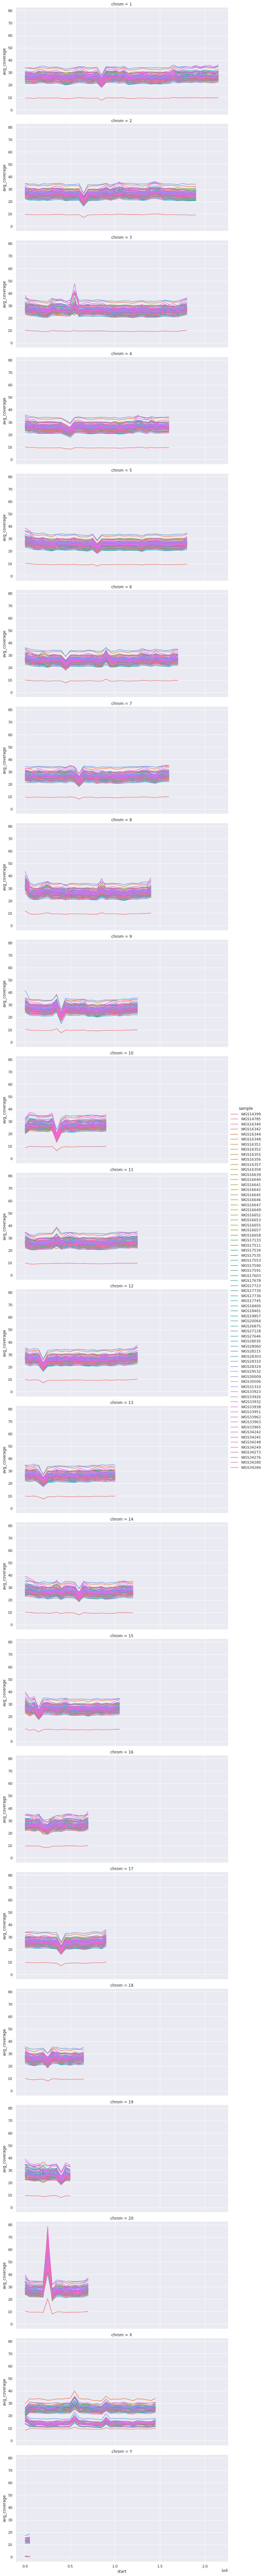

In [69]:
# Option 1: Seaborn implementation (difficult to view when many samples and not modified for normalized coverage)

sns.set_theme()
sns.relplot(data=df, hue="sample", row="chrom", x="start", y="avg_coverage", kind="line", height=5, aspect=2)

In [304]:
# Option 2: Bokeh implementation (with normalized coverage)

import itertools

from bokeh.io import curdoc, output_notebook
from bokeh.models import ColumnDataSource, WheelZoomTool, HoverTool, PanTool, ResetTool, Span
from bokeh.palettes import plasma as palette
from bokeh.plotting import figure, show
import numpy as np

samples = df["sample"].unique()
chromosomes = [str(i) for i in list(range(1,21))] + ["X", "Y", "MT"]

# Normalize samples
for sample in samples:
    avg = df.loc[df["sample"] == sample]["avg_coverage"].mean()
    df.loc[df["sample"] == sample, ["avg_coverage"]] /= avg
    df.loc[df["sample"] == sample, ["avg_coverage"]] = np.log2(df.loc[df["sample"] == sample, ["avg_coverage"]])

# Concat chromosomes
end = 0
chromosome_endpoints = []
for chrom in chromosomes:
    df.loc[df["chrom"] == chrom, ["start"]] += end
    end = df.loc[df["chrom"] == chrom]["start"].max()
    if chrom != "MT":  # Remove last endpoint
        chromosome_endpoints.append(end)


In [305]:
tooltips = [
    ("sample", "@sample"),
    ("Window", "@start - @end"),
    ("Chrom", "@chrom"),
    ("Normalized Coverage", "@avg_coverage")
]

# Create figure
p = figure(title="WGS Coverage of Rhesus Macaques", x_axis_label='Genome Postition', y_axis_label='Normalized Coverage',
    tools=[WheelZoomTool(), PanTool(), HoverTool(), ResetTool()], tooltips=tooltips)

# Add lines
colors = itertools.cycle(palette(len(samples)))
for sample in samples:
    color = next(colors)
    subset = df[df["sample"] == sample]
    source = ColumnDataSource(subset)
    p.line(x="start", y="avg_coverage", legend_label=sample, color=color, line_width=1, source=source)

# Modify properties
p.legend.label_text_font_size = "8px"
p.legend.title = "Samples"
p.sizing_mode = "stretch_width"
p.height = 700

# Add spans to separate chromosomes
for endpoint in chromosome_endpoints:
    p.add_layout(Span(location=endpoint, dimension="height", line_width=3))

In [306]:
curdoc().theme = "light_minimal"
output_notebook()
show(p)

Loading BokehJS ...

In [215]:
curdoc().theme = "light_minimal"
output_notebook()
show(p)

Loading BokehJS ...

In [188]:
curdoc().theme = "light_minimal"
output_notebook()
show(p)

Loading BokehJS ...

In [259]:
df.loc[df["sample"] == sample, ["normalized_coverage"]]

normalized_coverage
244790                  NaN
244791                  NaN
244792                  NaN
244793                  NaN
244794                  NaN
...                     ...
245363                  NaN
245364                  NaN
245365                  NaN
245367                  NaN
245368                  NaN

[558 rows x 1 columns]

In [298]:
df

sample chrom       start        end  avg_coverage
0       WGS14399     1           0    5000000      0.053374
1       WGS14399     1     5000000   10000000     -0.004931
2       WGS14399     1    10000000   15000000      0.000579
3       WGS14399     1    15000000   20000000      0.049245
4       WGS14399     1    20000000   25000000     -0.000643
...          ...   ...         ...        ...           ...
245363  WGS34284     X  2665000000  140000000     -0.019192
245364  WGS34284     X  2670000000  145000000     -0.011209
245365  WGS34284     X  2675000000  150000000      0.032814
245367  WGS34284     Y  2675000000    5000000     -5.168939
245368  WGS34284     Y  2680000000   10000000     -6.043408

[39618 rows x 5 columns]

In [287]:
test = np.log2(df.loc[df["sample"] == sample, ["avg_coverage"]])

In [290]:
test

avg_coverage
244790      4.628774
244791      4.580145
244792      4.563158
244793      4.591560
244794      4.577731
...              ...
245363      4.550285
245364      4.558268
245365      4.602291
245367     -0.599462
245368     -1.473931

[558 rows x 1 columns]

In [293]:
#df.loc[df["sample"] == sample, ["test"]] = test
df["test"] = test

In [294]:
df

sample chrom      start        end  avg_coverage      test
0       WGS14399     1          0    5000000      1.037689       NaN
1       WGS14399     1    5000000   10000000      0.996588       NaN
2       WGS14399     1   10000000   15000000      1.000402       NaN
3       WGS14399     1   15000000   20000000      1.034723       NaN
4       WGS14399     1   20000000   25000000      0.999554       NaN
...          ...   ...        ...        ...           ...       ...
245363  WGS34284     X  135000000  140000000     23.430000  4.550285
245364  WGS34284     X  140000000  145000000     23.560000  4.558268
245365  WGS34284     X  145000000  150000000     24.290000  4.602291
245367  WGS34284     Y          0    5000000      0.660000 -0.599462
245368  WGS34284     Y    5000000   10000000      0.360000 -1.473931

[39618 rows x 6 columns]